# Inaugural Project - The labour supply problem

In this project we will consider a labour supply problem. The focus of the project will be to examine how standard labour income taxes effects consumption and labour supply.

## The setting of the model:
A representative consumer solves the following maximization problem:

$$c^*,\mathcal{l}^* \quad = \quad arg \: \underset{c,\mathcal{l}}{max}  \: log(c) - v*\frac{\mathcal{l}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} \tag{1}$$ 
We note, that the utilitypreference of the consumer is quasi-linear. Furthermore we highlight the frischian elasticity ($\epsilon$), as we are going to use it later on. The frischian elasticity captures the elasticity of labour with respect to wage, holding constant the marginal utility of wealth. Thereby it can be interpret as a measure of the substitution effect of a change in the wage rate on labour supply.


The representative consumer faces the following constraints when solving the optimization problem:

$$x=m+v\mathcal{l}-[\tau_0*w*\mathcal{l}+\tau_1*max\{w\mathcal{l}-\kappa,0\}]$$

$$c\in[o,x]$$
$$\mathcal{l}\in[o,1]$$


As the utility is monotonically increasing in consumption we have the following conditions, which is going to be important:
$$c^*=x$$

Imports and set magics:

In [42]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2

# local modules
import inauguralproject


# Question 1

In the first question we are going to construct a function that solves equation 1:

The model is solved by using the class in the [inauguralproject.py] named ConsumerProblem.
For a solution given the parameters we simply assign the class and print the optimizer functions third output, "result". We also print the parameters to show the initial values implemented in the class

In [12]:
solution = inauguralproject.ConsumerProblem()

print(solution.optimizer()[3])
print(solution.para())

Labour is: 0.4, Consumption is: 1.24 and utility is: 0.1716
m: 1, v: 10, eps: 0.3, tau0: 0.4, tau1: 0.1, kappa: 0.4 and w: 1


# Question 2

We will now plot the optimal labour supply and consumption as functions of the wage rate in the range 0.5 to 1.5.

<function matplotlib.pyplot.show(*args, **kw)>

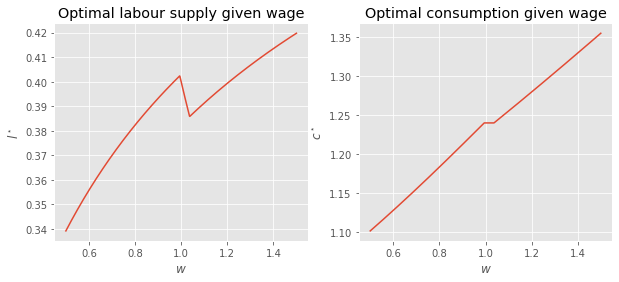

In [62]:
plt.style.use('ggplot')

density = 1000

w_vec = np.linspace(0.5, 1.5, num=density) #establishing a random uniform distributed wage variable 
l_opt = np.empty(density) #Creating empty tuple of range 10, to contain the optimal labour hours
c_opt = np.empty(density) #creating empty tuple of range 10, to contain the optimal consumption

for i in range(0,len(w_vec)): # Looping over the random wage vector to find optimal solutions for labour and consumption
    solution.w = w_vec[i]
    l_opt[i] = solution.optimizer()[0]
    c_opt[i] = solution.optimizer()[1]
   
#Creating the figure:    
fig = plt.figure(figsize=(10,4))

# Left plot showing optimal labour supply given wage
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# Right plot showing optimal consumption given wage
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show   

We start by noting that both labour supply and consumption is increasing in wages. In the left plot we find a jump down in the labour supply at a given wage rate. At this specific wage rate around $w=1$ the individual is going to pay the top income tax at the cutoff of $\kappa=0.4$. 
The intuitive interpretation is that at this given wage rate the consumer will experience an increase in the marginal cost of consumption relative to leisure when the top bracket tax influences the disposable income. Hence, when the top income tax kicks in, the consumer will require a higher wage for a given labour supply, because the consumer should now pay more in taxes. Thereby there exist a short interval, where labour supply decreases in the wage rate, because the consumer wants to stay just below the threshold for paying the top income tax rate at $\kappa=0.4$.

In the right plot we see that consumption follows the same path as labour supply, but in the interval, where labour supply is decreasing, consumption just stays the same. The consumer do not decrease consumption, because the dispoasble income at this interval is the same, so the consumer can consume excatly the same.

# Question 3 & 4

We are now going to calculate the total tax revenue given by:
$$T=\sum_{i=1}^N[\tau_0*w_i*\mathcal{l}_i^* + \tau_1*max \{w_i*\mathcal{l}_i^*-\kappa,0\}]$$
We also calculate the tax revenue in the specific case of $\epsilon=0.1$.

**Note:** Again the calculations is done by using the functions in the [inauguralproject.py] named ConsumerProblem.

In [63]:
solution = inauguralproject.ConsumerProblem() # Resets the parameters to default
print('The tax revenue is: ' + str(solution.tax())) # Prints tax revenue for epsilon = 0.3 (Default)
#print(solution.para()) # synes disse er lidt overflødige
solution.eps = 0.1 # changes epsilon (the frischian elasticity) inside the class parameters
print('The tax revenue when the frischian elasticity is changed to 0.1 is: ' + str(solution.tax())) # Print tax revenue for a frischian elasticity (epsilon) = 0.1

#print(solution.para()) #samme her, føler måske den er overflødig

#(Bemærk her siger vores TA, at det rigtige svar for tax revenue er 1629)
#Prøvede en lidt anden funktion af nedenfor, men den giver samme resultat. Ydermere testede jeg at totalen afhænger af seed nr, men vi kommer stadig der ikke ned på det svar holdunderviseren har skrevet vi skal få...

The tax revenue is: 1649.1165761853713
The tax revenue when the frischian elasticity is changed to 0.1 is: 3183.054554025229


In [37]:
solution = inauguralproject.ConsumerProblem()
print(solution.totaltaxrev())

1649.1165761853713


In [60]:
#legede med at lave en widget for at se hvordan taxrev ændrer sig med epsilon, men kunne ikke lige få et implementeret i vores class
widgets.interact(solution.tax,
    N = widgets.FloatSlider(description="$Number of firms$",min=0,max=1)
)

interactive(children=(FloatSlider(value=0.0, description='$Number of firms$', max=1.0), Output()), _dom_classe…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

We see that the lower frischian elasticity the tax revenue is higher. A lower elasticity causes individulas to substitute less towards leisure when taxes increases.

# Question 5

In this question we will try to maximize the tax revenue and thereby find the optimal parameter values of $\tau_0$, $\tau_1$ and $\kappa$. 


In [6]:
# code (made with loop)

ops = inauguralproject.ConsumerProblem() # Optimal Parameter Settings 


# Define the optimal parameter settings and the given tax
# We start by setting everything to zero and update them trough the 3-fold loop
kappa_star = 0
tau0_star = 0
tau1_star = 0
Tax_star=0

# Define the accuracy of the parameters

A = 0.001
end = 1+A

#The loop
for h in np.arange(0,end,A):
    ops.kappa = h
    for j in np.arange(0,end,A):
        ops.tau_1 = j
        for i in np.arange(0,end,A):
            ops.tau_0 = i
            
            tax_rev = ops.tax(N=10) # For convenience we set Population = 10

            if tax_rev > Tax_star:
                Tax_star = tax_rev
                kappa_star = h
                tau1_star = j
                tau0_star = i



print('Kappa should be: ' + str(round(kappa_star,4)))
print('Tau0 should be: ' + str(round(tau0_star,4)))
print('Tau1 should be: ' + str(round(tau1_star,4)))
print('Tax Revenue would then be ' + str(round(Tax_star,4)))

#Vi skal have printet det ovenstående med 3-4 decimaler


KeyboardInterrupt: 

# Conclusion

We are now able to make some concluding remarks:

In question 1 we saw that utility is maximized when the chosen consumption is 1.1018 and labour 0.3392. For these given values the utility is 0.0756

In question 2 we saw that in general both the labour supply and consumption is increasing in wages. For a specific interval of wagerate the labour supply is decreasing due to the threshold of paying the high income tax.

In question 3 and 4 bla bla

In question 5 bla bla

Summing up; we have now examined a traditionel labour supply problem and investigated how different standard tax rates effect the optimal consumption and leisure. 